In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading csv file


In [6]:
insurance = pd.read_csv('insurance.csv')

## Working around our csv file. [DATA ANALYSIS]


In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
insurance.shape

(1338, 7)

In [16]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
insurance.loc[insurance['children']==1]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
6,46,female,33.440,1,no,southeast,8240.58960
15,19,male,24.600,1,no,southwest,1837.23700
16,52,female,30.780,1,no,northeast,10797.33620
21,30,female,32.400,1,no,southwest,4149.73600
...,...,...,...,...,...,...,...
1310,42,male,26.315,1,no,northwest,6940.90985
1312,34,male,42.900,1,no,southwest,4536.25900
1315,18,male,28.310,1,no,northeast,11272.33139
1324,31,male,25.935,1,no,northwest,4239.89265


In [19]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
insurance.groupby(['region']).count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


## EDA : Exploratory Data Analysis



In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder 


In [37]:
columns = [cols for cols in insurance.columns if insurance[cols].dtype=='object']
columns

['sex', 'smoker', 'region']

In [38]:
for column in columns:
    print(insurance[column].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [39]:
col_nominal = [columns.pop(2)]
col_nominal


['region']

In [41]:
# Label Encoding is done for binary labels as yes/no, T/F, etc
insurance[columns] = insurance[columns].apply(LabelEncoder().fit_transform)

# One Hot Encoding is done for multiple-labelled-columns
insurance = pd.get_dummies(insurance,columns=col_nominal,prefix=col_nominal)

insurance.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Correlation check


In [48]:
insurance.corrwith(insurance['charges']).sort_values(ascending=True)

region_southwest   -0.043210
region_northwest   -0.039905
region_northeast    0.006349
sex                 0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker              0.787251
charges             1.000000
dtype: float64

<AxesSubplot:>

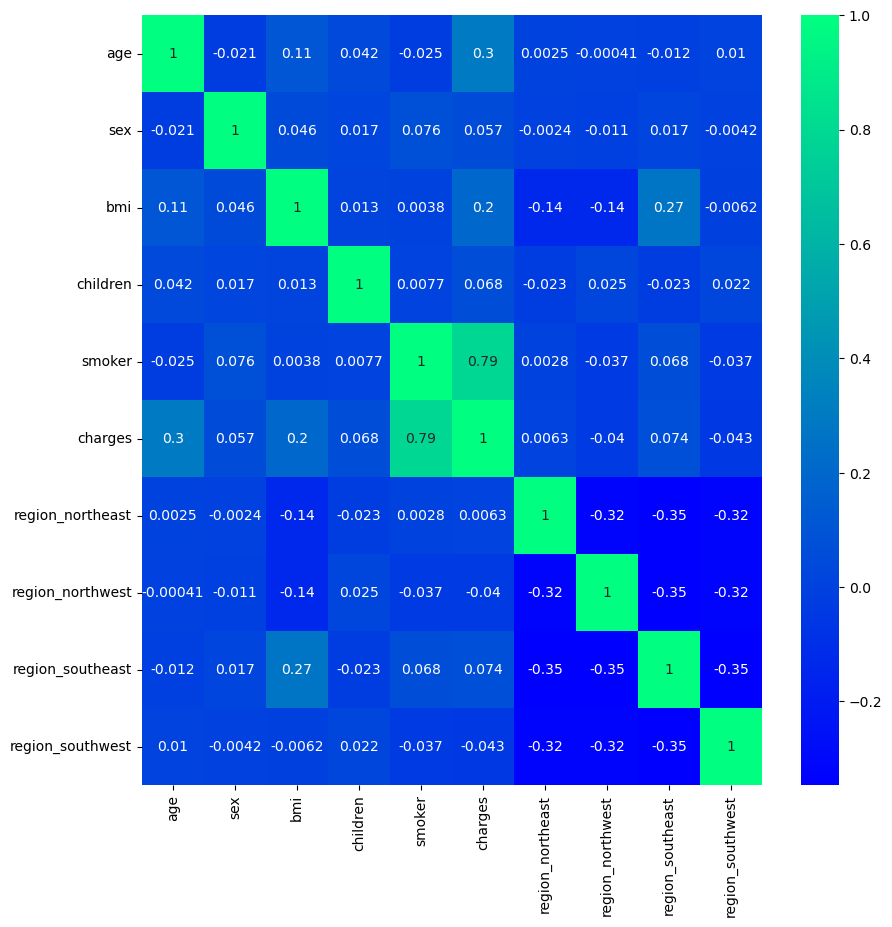

In [60]:
f,ax = plt.subplots(figsize=(10,10))
corr = insurance.corr()
sns.heatmap(corr,annot=True,cmap='winter',ax=ax)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

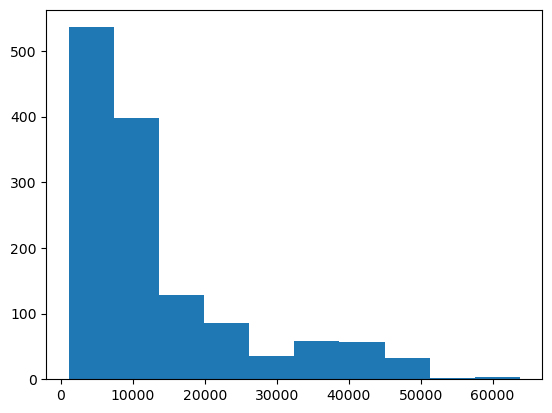

In [61]:
plt.hist(insurance.charges)

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 [<matplotlib.patches.Polygon at 0x7f7ed158c4c0>])

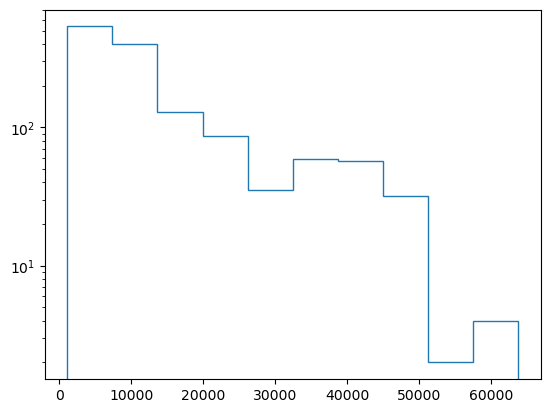

In [71]:
plt.hist(insurance['charges'], histtype='step', log=True)

<AxesSubplot:xlabel='charges', ylabel='Density'>

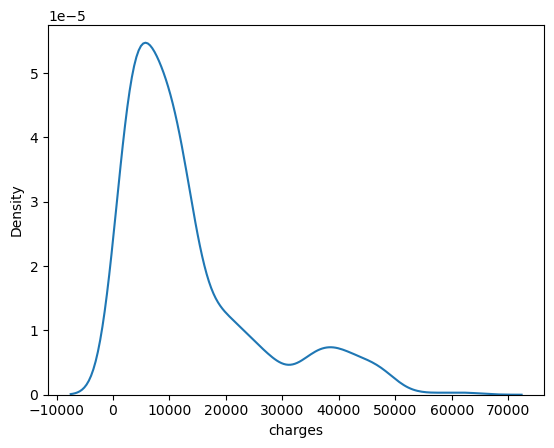

In [73]:
sns.kdeplot(insurance.charges)

<AxesSubplot:xlabel='charges', ylabel='Count'>

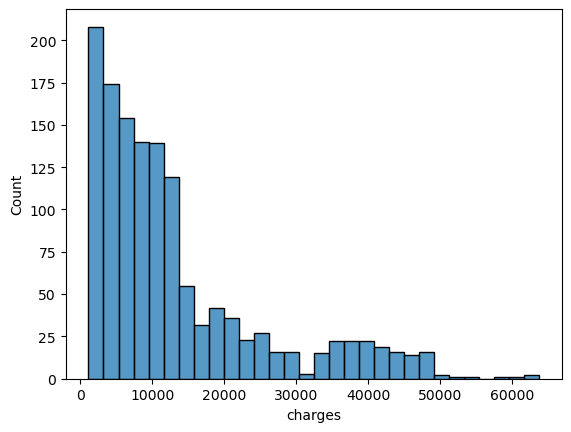

In [75]:
sns.histplot(insurance.charges)

In [97]:
# # sns.displot(insurance[(insurance.smoker == 0)]['charges'])
# sns.displot(insurance[(insurance['smoker'] == 0)]['charges'],legend=True,kde=True)
# sns.displot(insurance[(insurance['smoker'] == 1)]['charges'],legend=True,kde=True)


Text(0.5, 1.0, 'SMOKERS')

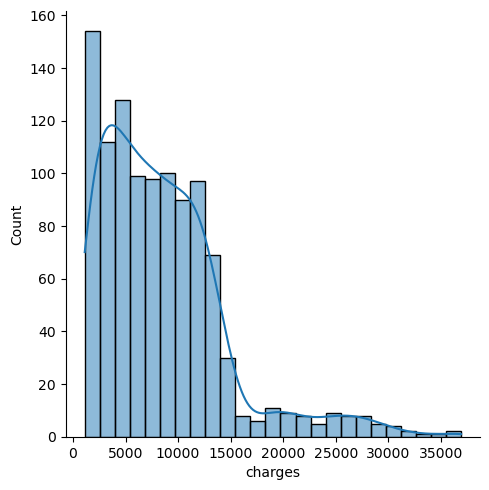

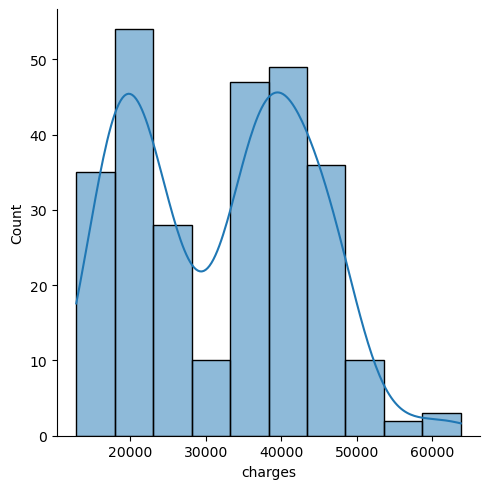

In [92]:
# fig = plt.figure(figsize=(10,8))
sns.displot(insurance[(insurance['smoker'] == 0)]['charges'],legend=True,kde=True)
ax.set_title("Non-Smokers")
sns.displot(insurance[(insurance['smoker'] == 1)]['charges'],legend=True,kde=True)
ax.set_title("SMOKERS")

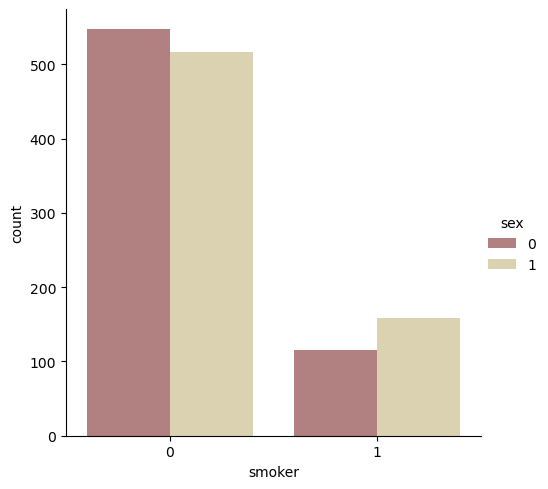

In [96]:
sns.catplot(x='smoker',data=insurance, hue='sex',palette='pink',kind='count')

Non-smoking patients are more among which women=1 and men=0 i.e. male patients are more.

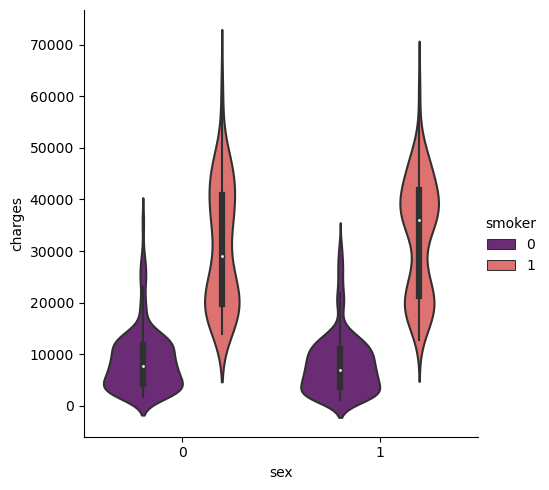

In [99]:
sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=insurance, palette = 'magma')

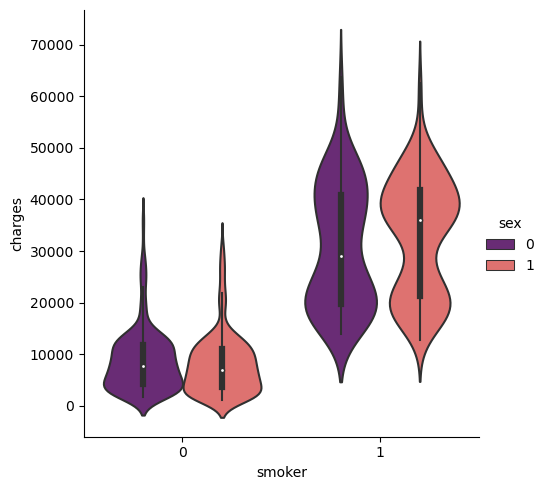

In [106]:
sns.catplot(x="smoker", y="charges", hue="sex",kind="violin", data=insurance, palette = 'magma')

0 is non smoker among which sex-0 is male and sex-1 is female. We can see violin plot of non smoker and smoker with respective sex. Viceversa is true for the plot above this plot.


<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

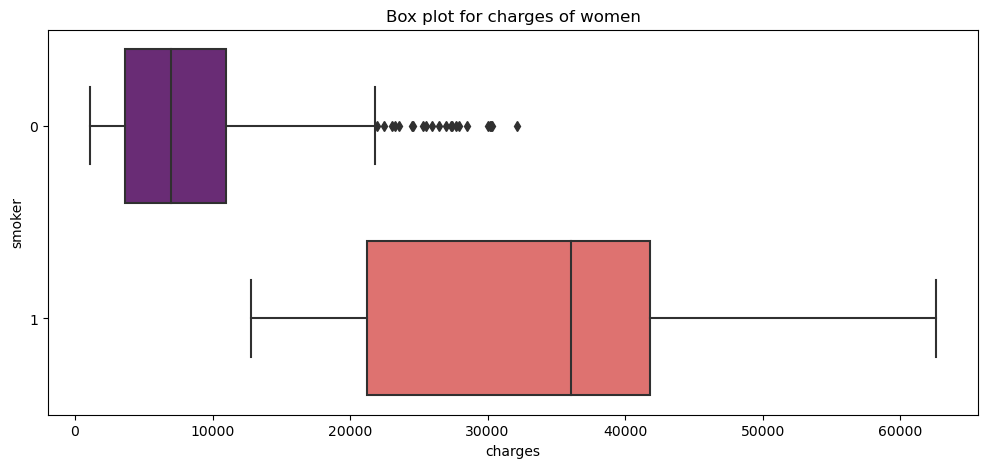

In [103]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")

sns.boxplot(y="smoker", x="charges", data =  insurance[(insurance.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

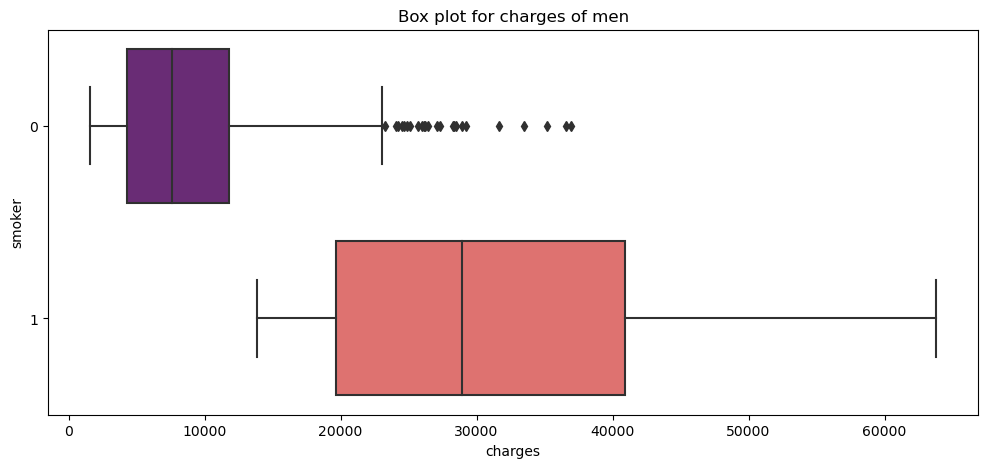

In [105]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  insurance[(insurance.sex == 0)] , orient="h", palette = 'magma')

This is box plot (5-point-plot) for smoker and sex relation separately.

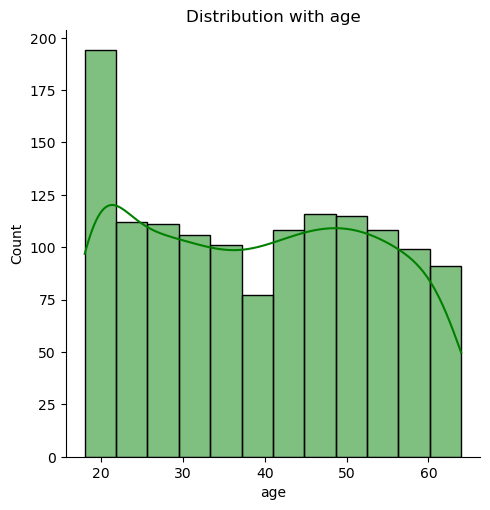

In [123]:
# plt.figure(figsize=(10,5))
# plt.title("Distribution of age:")
sns.displot(insurance.age, color='g',kde=True,aspect=2/2).set(title="Distribution with age")
# sns.title("Distribution of age:")
# sns.distplot(insurance.age)

Displot instead of Distplot is used for which we have to specify kde=True. Distplot is removed in later version of sns.

Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

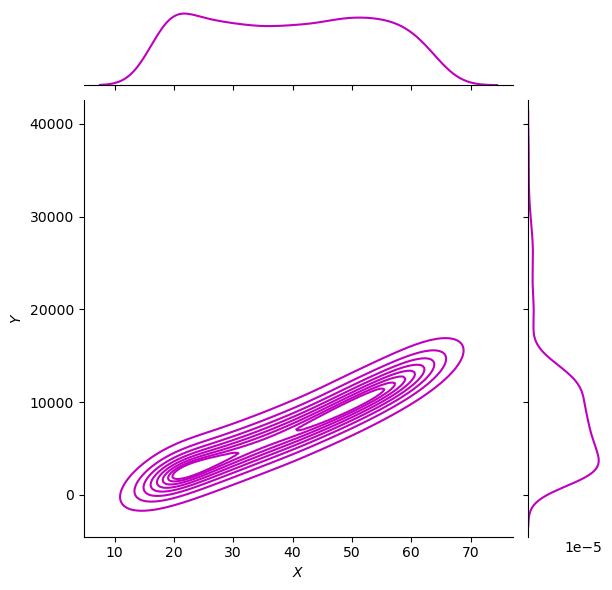

In [129]:
g = sns.jointplot(x="age", y="charges", data = insurance[(insurance.smoker == 0)],kind="kde", color="m") #.set(title='Distribution of charges and age for non-smokers')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")


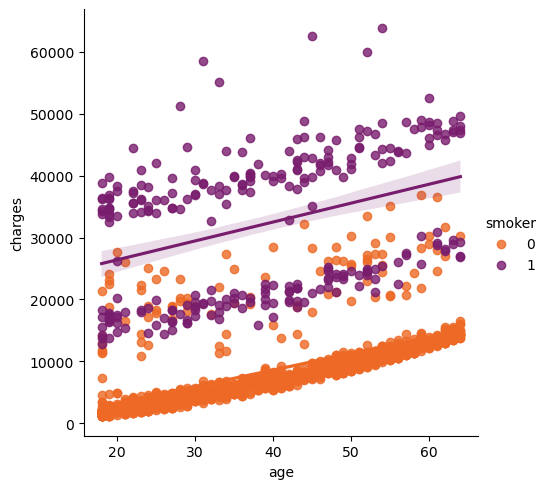

In [135]:
sns.lmplot(x="age", y="charges", hue="smoker", data=insurance, palette = 'inferno_r')
# ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends! In smoking people, we do not see such dependence. I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs.

#### Do similar with BMI

# Regression

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [137]:
X = insurance.drop('charges',axis=1)

In [138]:
y = insurance.charges

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,train_size=0.75)

In [140]:
lr = LinearRegression().fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7162745306503479


In [142]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,y_pred_train),
mean_squared_error(y_test,y_pred_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_pred_train),
r2_score(y_test,y_pred_test)))

MSE train data: 36071545.499, MSE test data: 38150907.331
R2 train data: 0.760, R2 test data: 0.716


### using polynomial Linear Regression


In [145]:
X = insurance.drop(['charges','region_northeast',"region_northwest","region_southeast","region_southwest"],axis=1) 
# x = insurance - (charges and region)
y= insurance.charges

In [147]:
#Defining polynomial degree and fitting X accordingly
quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(X)


In [155]:
#splitting dataset
X_train,X_test,y_train,y_test = train_test_split(x_quad,y,random_state=90,train_size=0.75)

In [157]:
# polynomial linear regression model
PLR = LinearRegression().fit(X_train,y_train)
y_pred_test = PLR.predict(X_test)
y_pred_train = PLR.predict(X_train)
print(PLR.score(X_test,y_test)) #seems to change with random state as well. how?
# found that my splitting may be on random. state of RNG_seeds can affect the used pipeline

0.8634868316673439


In [160]:
print('MSE train data: %.3f,\nMSE test data: %.3f' % (
mean_squared_error(y_train,y_pred_train),
mean_squared_error(y_test,y_pred_test)))
print('R2 train data: %.3f,\nR2 test data: %.3f' % (
r2_score(y_train,y_pred_train),
r2_score(y_test,y_pred_test)))

MSE train data: 24306314.618,
MSE test data: 18807272.862
R2 train data: 0.837,
R2 test data: 0.863


## Random Forest Regressor : ensemble


In [163]:
forest = RandomForestRegressor(n_estimators = 100,criterion = 'squared_error', random_state = 1, n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

In [164]:
print('MSE train data: %.3f,\nMSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f,\nR2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3890140.978,
MSE test data: 21897129.774
R2 train data: 0.974,
R2 test data: 0.841


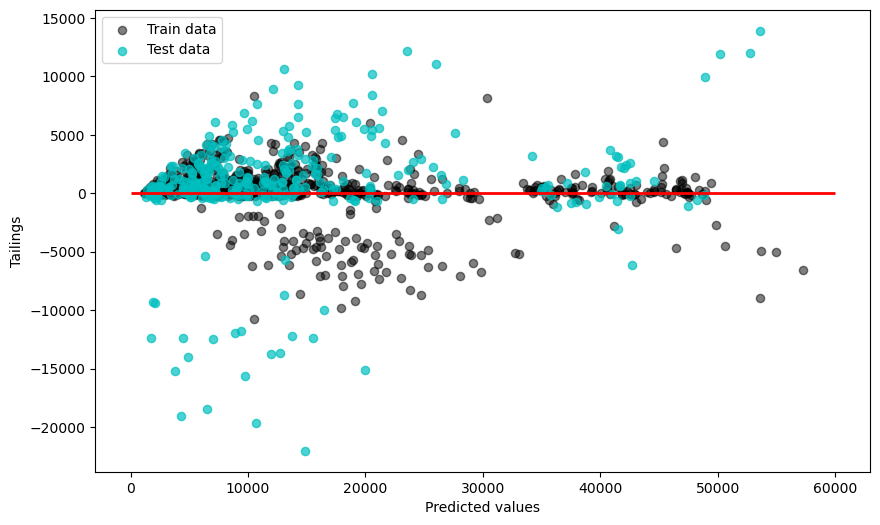

In [166]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()